In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
## setting up the range and the field of view (FOV)
N = 500
FOV = 5e-4
x = np.linspace(0,FOV,N)
sample_rate = x[2] - x[1]
# FOV = 0.01
# x = np.linspace(0,FOV,N)
# sample_rate = x[2] - x[1]

wavelength = 532e-9

In [24]:
## Calculating the k-values to plot the transform against
kvalues = np.empty(N)

if N % 2 == 0:
    kvaluesoriginal = np.linspace(-N/2,(N/2)-1,N)/(sample_rate*N)
else:
    kvaluesoriginal = np.linspace(-(N-1)/2,(N-1)/2,N)/(sample_rate*N)
newN = int(N/2)
if N % 2 == 0:
    kvalues[0:newN] = kvaluesoriginal[newN:N]
    kvalues[newN:N] = kvaluesoriginal[0:newN]
if N % 2 != 0:
    kvalues[0:newN+1] = kvaluesoriginal[newN:N]
    kvalues[newN+1:N] = kvaluesoriginal[0:newN]

In [25]:
## Setting up the reflectivity as a function of x. This is what we'll be taking the transform of.
Reflectivity = np.ones(N)/2
# Reflectivity = Reflectivity/2
Reflectivity[int(np.floor(3*N/7)):int(np.floor(4*N/7))] = 0.8
# Reflectivity[int(np.floor(7*N/14)):int(np.floor(8*N/14))] = 0.8
Object = Reflectivity*FOV

## Calling and defining the transform and inverse using the built-in functions.
fftf = np.fft.fft(Reflectivity)
ifftf = np.fft.ifft(fftf)
k = np.fft.fftfreq(N,sample_rate)
kf = kvalues

## Here to the end of the cell is going through the transform and inverse by hand w/ the "shadow function"
newx = np.arange(0,N,1)
OneD_transform = np.empty(N,dtype=np.complex)
OneD_inverse_transform = np.empty(N,dtype=np.complex)
OneD_forward_integrand = np.empty(N,dtype=np.complex)
OneD_backward_integrand = np.empty(N,dtype=np.complex)
deltak = 1/FOV

for n in range(0,N):
    shadow_function = np.ones(N)
    if n > 0:
        theta = 2*np.arcsin(n*wavelength*deltak/2)
        for i in range(0,N-1):
            h = Object[i+1] - Object[i]
            d = h*np.tan(theta/2)
            dindex = int(np.floor(d/sample_rate))
            if h > FOV/5:
                dindex = int(np.floor(d/sample_rate))
                shadow_function[max(0,i-dindex):i] = 0.0
            if h < -FOV/5:
                dindex = int(np.floor(-d/sample_rate))
                shadow_function[i:min(N,i+dindex)] = 0.0
    OneD_forward_integrand = Reflectivity*np.exp(n*(-1j)*newx*2*np.pi/N)*shadow_function
    OneD_transform[n] = sum(OneD_forward_integrand)

    
tolerance = 1e-10
OneD_transform.real[abs(OneD_transform.real) < tolerance] = 0.0
OneD_transform.imag[abs(OneD_transform.imag) < tolerance] = 0.0


for n in range(0,N):
    OneD_backward_integrand = OneD_transform*np.exp(n*1j*newx*2*np.pi/N)
    OneD_inverse_transform[n] = sum(OneD_backward_integrand)/N

/home/carter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log


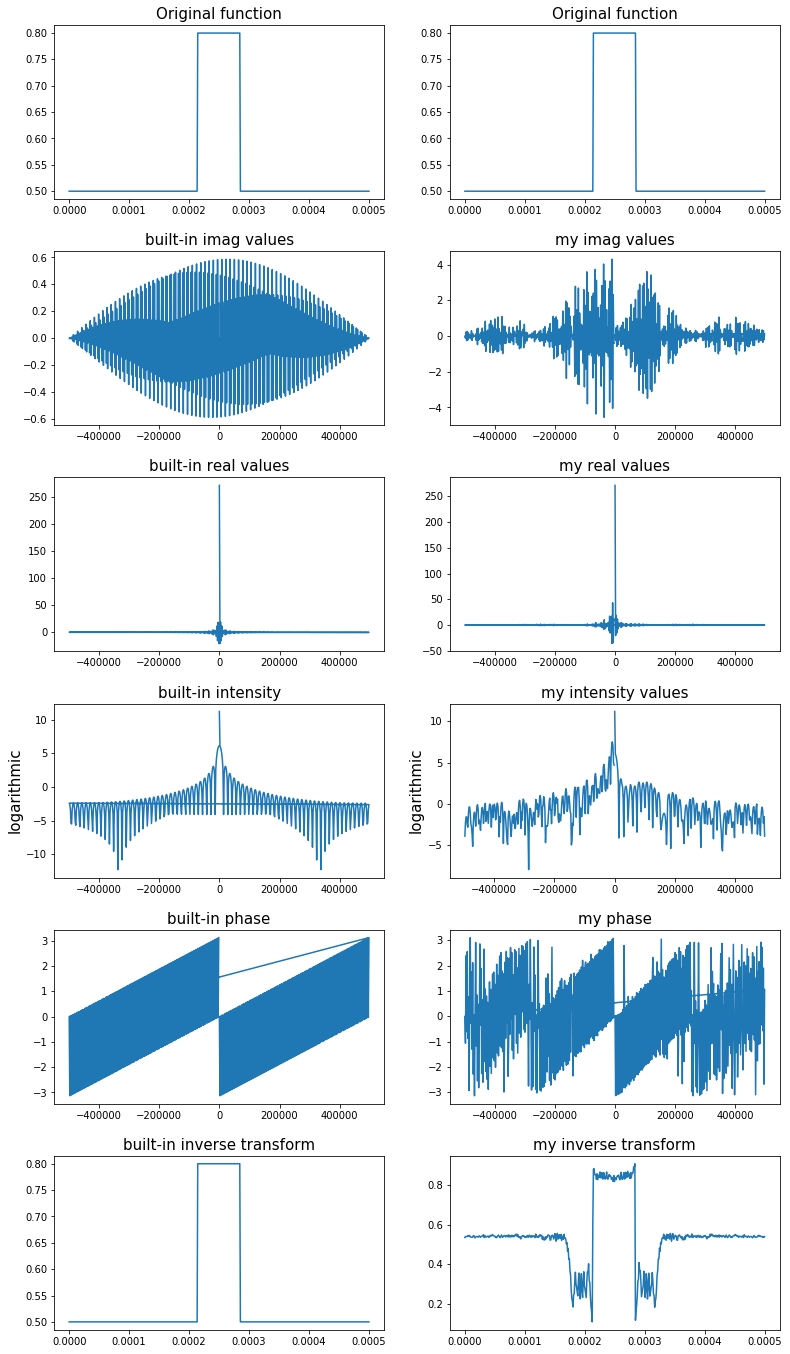

In [27]:
##The whole cell is just plotting the functions called and defined in previous cells

plt.subplots(figsize=(13,24))
plt.subplot(6,2,1)
plt.title('Original function', fontsize=15)
plt.plot(x,Reflectivity)

plt.subplot(6,2,3)
plt.title('built-in imag values', fontsize=15)
plt.plot(k,fftf.imag)

plt.subplot(6,2,5)
plt.title('built-in real values', fontsize=15)
plt.plot(k,fftf.real)

plt.subplot(6,2,7)
plt.title('built-in intensity', fontsize=15)
plt.ylabel('logarithmic', fontsize=15)
plt.plot(k,np.log((np.absolute(fftf))**2))

plt.subplot(6,2,9)
plt.title('built-in phase', fontsize=15)
plt.plot(k,np.angle(fftf))

plt.subplot(6,2,11)
plt.title('built-in inverse transform', fontsize=15)
plt.plot(x,ifftf.real)



plt.subplot(6,2,2)
plt.title('Original function', fontsize=15)
plt.plot(x,Reflectivity)

plt.subplot(6,2,4)
plt.title('my imag values', fontsize=15)
plt.plot(kf,OneD_transform.imag)

plt.subplot(6,2,6)
plt.title('my real values', fontsize=15)
plt.plot(kf,OneD_transform.real)
    
plt.subplot(6,2,8)
plt.title('my intensity values', fontsize=15)
plt.ylabel('logarithmic', fontsize=15)
plt.plot(kf,np.log((np.absolute(OneD_transform))**2))

plt.subplot(6,2,10)
plt.title('my phase', fontsize=15)
plt.plot(kf,np.angle(OneD_transform))

plt.subplot(6,2,12)
plt.title('my inverse transform', fontsize=15)
plt.plot(x,np.fft.ifft((OneD_transform)).real)
plt.subplots_adjust(hspace=0.3)
plt.show()

In [18]:
## What I used to use. The current version is more efficient.

# for n in range(0,N):
#     shadow_function = np.ones(N)
#     if n > 0:
#         for i in range(0,N-1):
#             h = 0
#             h = Object[i+1] - Object[i]
#             theta = 2*np.arcsin(n*wavelength*deltak/2)
#             if h > FOV/5:
#                 d = h*np.tan(theta/2)
#                 distance_between_peaks = wavelength/(2*np.sin(theta/2))
#                 dindex = int(np.floor(d/sample_rate))
#                 print(n, Object[i+1] - Object[i], h)
#                 shadow_function[max(0,i-dindex):i] = 0.0
#             if h < -FOV/5:
#                 d = -h*np.tan(theta/2)
#                 dindex = int(np.floor(d/sample_rate))
#                 shadow_function[i:min(N,i+dindex)] = 0.0
#                 print(n,d,dindex, Object[i+1] - Object[i], h)
#     print(shadow_function)
#     OneD_forward_integrand = Reflectivity*np.exp(n*(-1j)*newx*2*np.pi/N)*shadow_function
#     OneD_transform[n] = sum(OneD_forward_integrand)

# tolerance = 1e-10
# OneD_transform.real[abs(OneD_transform.real) < tolerance] = 0.0
# OneD_transform.imag[abs(OneD_transform.imag) < tolerance] = 0.0

# for n in range(0,N):
#     OneD_backward_integrand = OneD_transform*np.exp(n*1j*newx*2*np.pi/N)
#     OneD_inverse_transform[n] = sum(OneD_backward_integrand)/N
